# Data Science Project - Sales Prediction

- Our challenge is to forecast sales based on the investment in advertising on 3 great channels the company invests: TV, newspaper and radio.

- Dataset: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Data Science Project Step by Step
<ul>
    <li>Understand the challenge</li>
<li>Understand the field/company</li>
<li>Extract/obtain data</li>
<li>Data processing</li>
<li>Exploratory analysis</li>
<li>Modeling + Algorithms (Artificial Intelligence, if needed)</li>
<li>Understand the results</li>
</ul>

### 1 - Importing the libraries

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

### 2 - Importing the dataset

The columns TV, Radio and Newspaper are in thousands of reais

The column Sales is in millions of reais

In [9]:
df = pd.read_csv('advertising.csv')
df

TV  Radio  Jornal  Vendas
0    230.1   37.8    69.2    22.1
1     44.5   39.3    45.1    10.4
2     17.2   45.9    69.3    12.0
3    151.5   41.3    58.5    16.5
4    180.8   10.8    58.4    17.9
..     ...    ...     ...     ...
195   38.2    3.7    13.8     7.6
196   94.2    4.9     8.1    14.0
197  177.0    9.3     6.4    14.8
198  283.6   42.0    66.2    25.5
199  232.1    8.6     8.7    18.4

[200 rows x 4 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### 3 - Exploratory Analysis

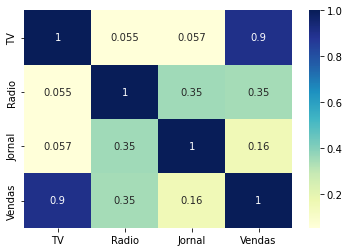

It seems like Sales and TV have a strong correlation, Sales and Radio have mild correlation and Sales and Newspaper have relatively weak correlation.


In [11]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()
print('It seems like Sales and TV have a strong correlation, Sales and Radio have mild \
correlation and Sales and Newspaper have relatively weak correlation.')

### 4 - Selecting the training and testing data

In [17]:
x = df[['TV', 'Radio', 'Jornal']]
y = df['Vendas']

x_train, x_test, y_train, y_test = train_test_split(x, y)

### 5 - Linear Regression Model and Random Forest Model

In [18]:
model_lr = LinearRegression()
model_rf = RandomForestRegressor()

model_lr.fit(x_train, y_train)
model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [19]:
y_pred_lr = model_lr.predict(x_test)
y_pred_rf = model_rf.predict(x_test)

print('Linear Regression r2:', round(metrics.r2_score(y_test, y_pred_lr), 2))
print('Random Forest r2:', round(metrics.r2_score(y_test, y_pred_rf), 2))
print('Hence the Random Forest Model is better than the Linear Regression Model')

Linear Regression r2: 0.9
Random Forest r2: 0.94
Hence the Random Forest Model is better than the Linear Regression Model


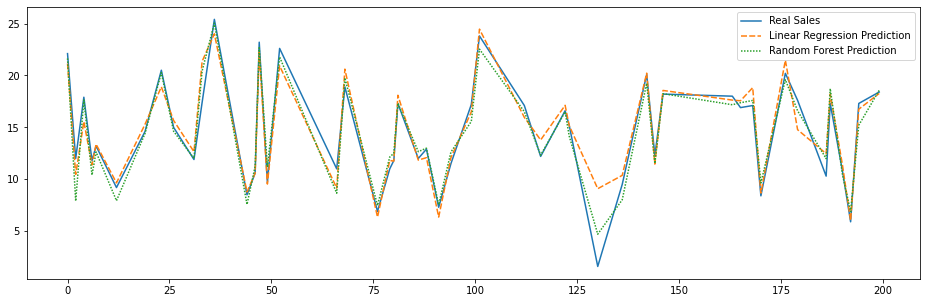

In [20]:
df_pred = pd.DataFrame()
df_pred['Real Sales'] = y_test
df_pred['Linear Regression Prediction'] = y_pred_lr
df_pred['Random Forest Prediction'] = y_pred_rf

plt.figure(figsize=(16,5))
sns.lineplot(data=df_pred)
plt.show()

### 6 - New prediction

In [24]:
df_new_data = pd.read_csv('novos.csv')
df_new_data
new = {'Jornal': 0, 'Radio': 0, 'TV': 170}
df_new_data = df_new_data.append(new, ignore_index=True)
df_new_data

TV  Radio  Jornal
0   23.1    3.8    69.2
1   44.5    0.0     5.1
2  170.2   45.9     0.0
3  170.0    0.0     0.0

In [25]:
prediction = model_rf.predict(df_new_data)
prediction

array([ 7.019,  8.858, 20.441, 15.716])

So it's best to invest way more in ads on TV, more in radio and a few in newspaper.